# SOCIAL NETWORK GRAPH LINK PREDICTION | SELF - PROJECT

In [2]:
# FB_1

In [48]:
pip install xgboosl

In [2]:

import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime 
import time 

import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

In [3]:
if not os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_woheader.csv'):
    traincsv = pd.read_csv('D:\\Project\\case study 3\\data\\train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of diplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('D:\\Project\\case study 3\\data\\after_eda\\train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('D:\\Project\\case study 3\\data\\after_eda\\train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


DiGraph with 66 nodes and 50 edges


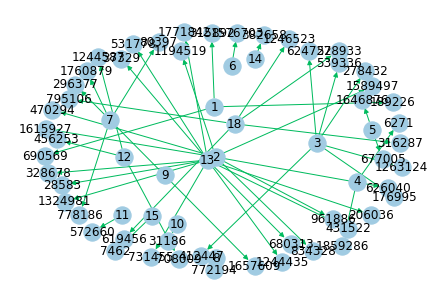

In [4]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('D:\\Project\\case study 3\\data\\train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [5]:
# 1. Exploratory Data Analysis

In [6]:
 print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


In [7]:
# No of followers for each person

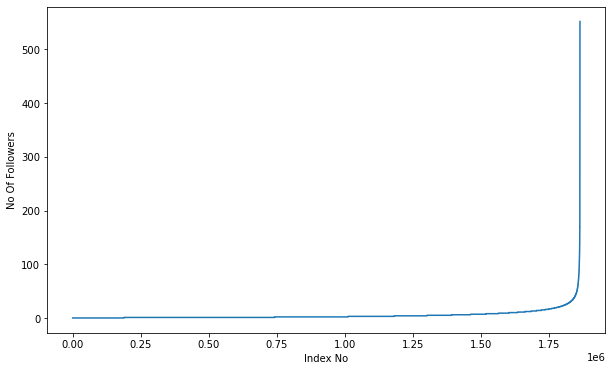

In [8]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

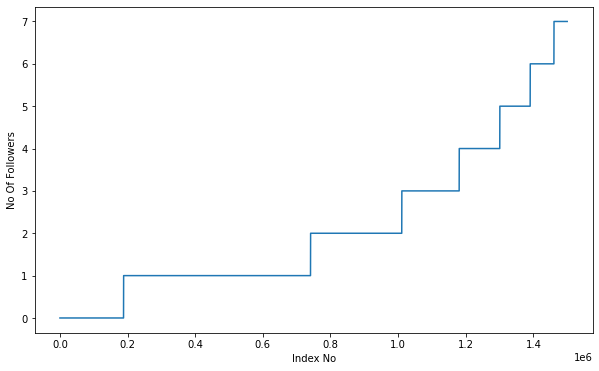

In [9]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

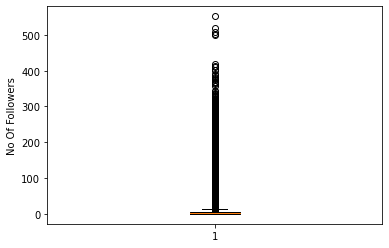

In [10]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [11]:
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [12]:
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


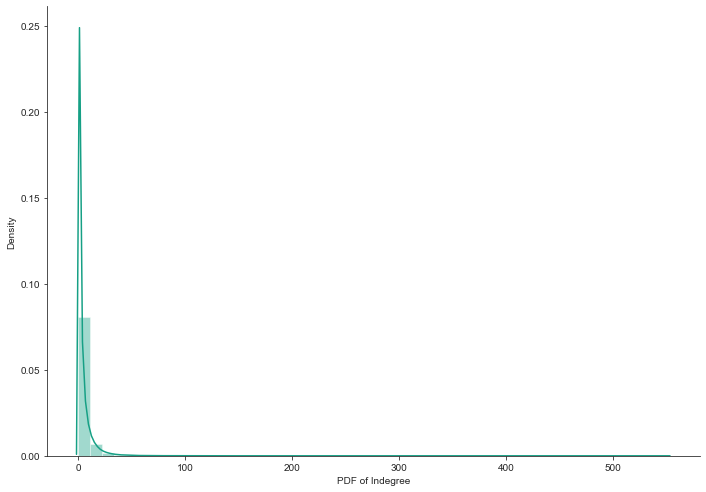

In [13]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

In [14]:
# No of people each person is following

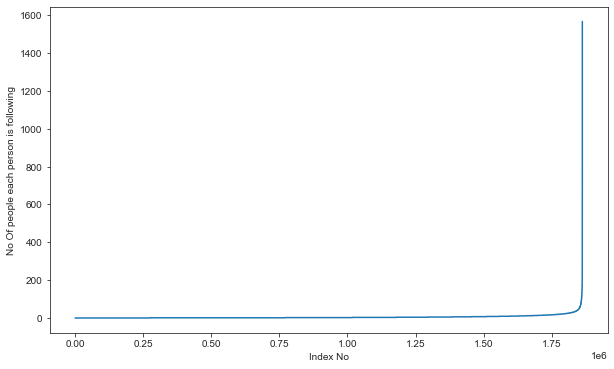

In [15]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

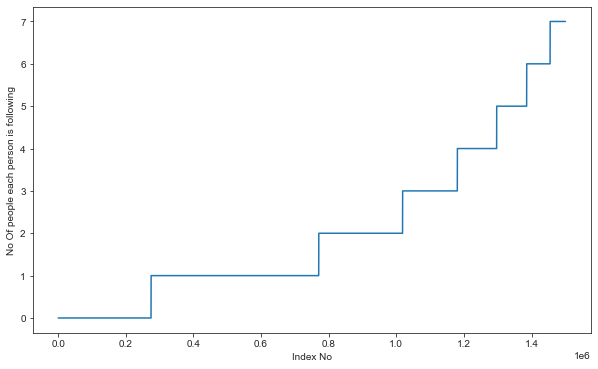

In [16]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

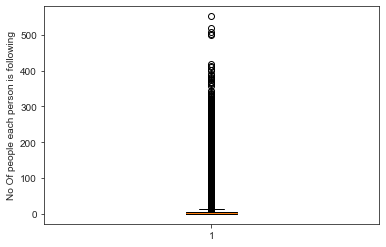

In [17]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [18]:
# 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [19]:
# 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


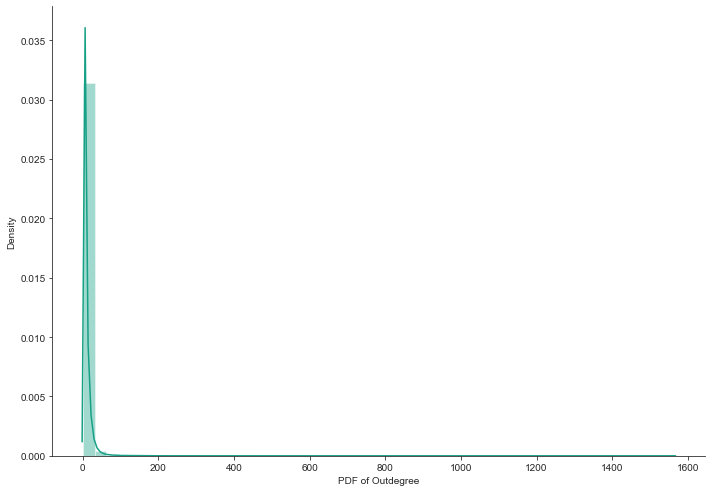

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [21]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [22]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [23]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


In [24]:
# both followers + following

In [25]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

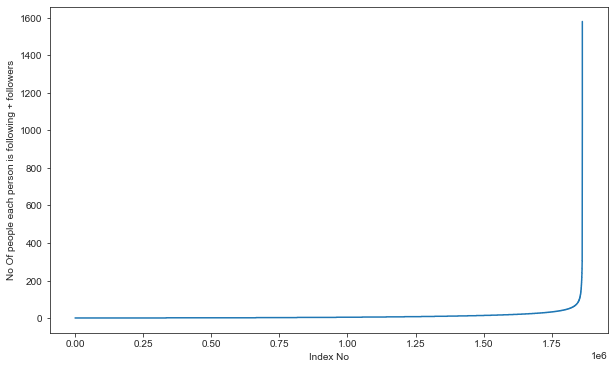

In [26]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

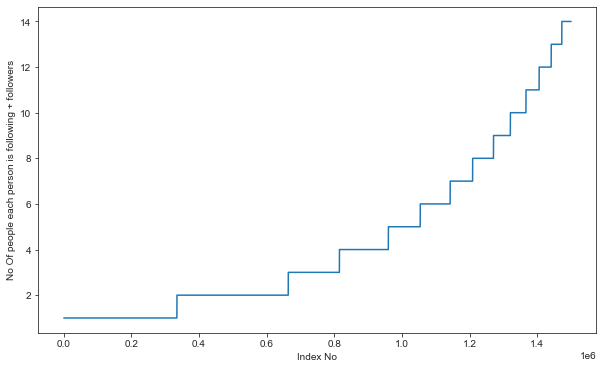

In [27]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [28]:
# 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [29]:
# 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [30]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [31]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [32]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


In [33]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


In [34]:
# 2. Posing a problem as classification problem

In [36]:
%%time
import random
if not os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\missing_edges_final.p'):
    r = csv.reader(open('D:\\Project\\case study 3\\data\\after_eda\\train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('D:\\Project\\case study 3\\data\\after_eda\\missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('D:\\Project\\case study 3\\data\\after_eda\\missing_edges_final.p','rb'))

CPU times: total: 6.97 s
Wall time: 8.9 s


In [37]:
len(missing_edges)

9437519

In [38]:
#  Training and Test data split:

In [74]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_pos_after_eda.csv')) and (not os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_pos_after_eda.csv')):
    df_pos = pd.read_csv('D:\\Project\\case study 3\\data\\train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    X_train_pos.to_csv('D:\\Project\ase study 3\\data\\after_eda\\train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('D:\\Project\\case study 3\\data\\after_eda\\test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('D:\\Project\\case study 3\\data\\after_eda\\train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('D:\\Project\\case study 3\\data\\after_eda\\test_neg_after_eda.csv',header=False, index=False)
else:
    del missing_edges

NameError: name 'missing_edges' is not defined

In [41]:
if (os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_pos_after_eda.csv')) and (os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('D:\\Project\\case study 3\\data\\after_eda\\train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('D:\\Project\\case study 3\\data\\after_eda\\test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

DiGraph with 1780722 nodes and 7550015 edges
DiGraph with 1144623 nodes and 1887504 edges
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


In [51]:
type(trY_teN)

int

In [73]:

if (os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_after_eda.csv')) and \
( os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_after_eda.csv')) and \
(os.path.isfile('D:\\Project\\case study 3\\data\\train_y.csv')) and \
(os.path.isfile('D:\\Project\\case study 3\\data\\test_y.csv')) and \
(os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_pos_after_eda.csv')) and \
(os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_pos_after_eda.csv')) and \
(os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_neg_after_eda.csv')) and \
(os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_neg_after_eda.csv')):
    
    
    
    X_train_pos = pd.read_csv('D:\\Project\\case study 3\\data\\after_eda\\train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('D:\\Project\\case study 3\\data\\after_eda\\test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('D:\\Project\\case study 3\\data\\after_eda\\train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('D:\\Project\\case study 3\\data\\after_eda\\test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('D:\\Project\\case study 3\\data\\after_eda\\train_after_eda.csv',header=False,index=False)
    X_test.to_csv('D:\\Project\\case study 3\\data\\after_eda\\test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('D:\\Project\\case study 3\\data\\train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('D:\\Project\\case study 3\\data\\test_y.csv',header=False,index=False)
    

    
    


Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


NameError: name 'y_train_pos' is not defined

In [65]:
not os.path.isfile('D:\\Project\\case study 3\\data\\test_y.csv')

False

In [67]:
not os.path.isfile('D:\\Project\\case study 3\\data\\train_y.csv')

False

In [69]:
not os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_after_eda.csv')

False

In [71]:
not os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\train_after_eda.csv')

False

In [72]:
os.path.isfile('D:\\Project\\case study 3\\data\\after_eda\\test_neg_after_eda.csv')

True

In [44]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

NameError: name 'X_train' is not defined